In [ ]:
# !pip install imbalanced-learn==0.6.0
# !pip install scikit-learn==0.22.1

In [1]:
#!pip install imbalanced-learn --user
#!pip install imbalanced-learn
#!pip install imblearn
#!pip install imblearn
# !pip install -U scikit-learn
# !pip install -U imbalanced-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
#from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
customer = df.loc[:,['SeniorCitizen', 'tenure','MonthlyCharges', 'Churn']]

In [6]:
customer.head()
customer.shape

(7043, 4)

In [7]:
customer.isna().sum() #no null values

SeniorCitizen     0
tenure            0
MonthlyCharges    0
Churn             0
dtype: int64

In [8]:
customer.dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
Churn              object
dtype: object

In [9]:
customer['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [10]:
correlations = customer.corr()
correlations

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


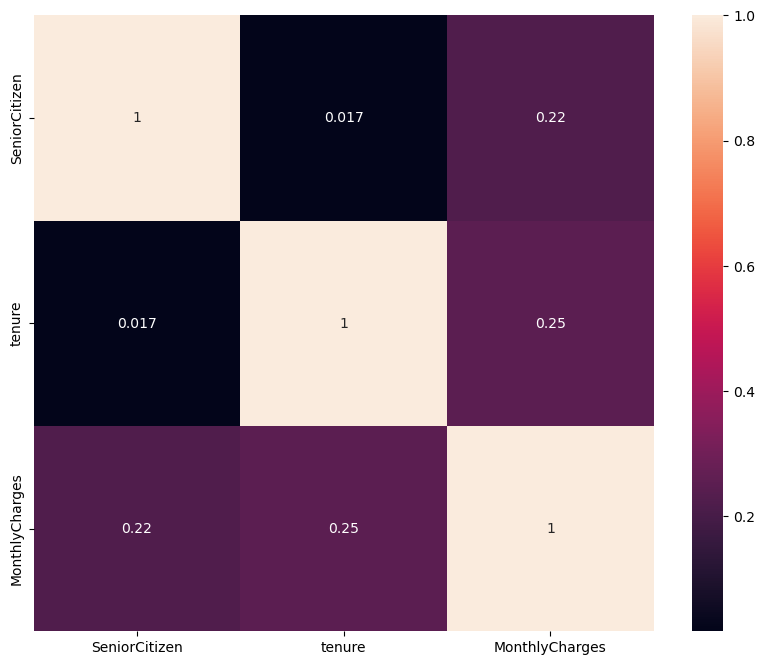

In [11]:
fig, ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(correlations, annot=True)
plt.show()

### Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

In [12]:
y = customer['Churn']
X = customer.drop(['Churn'], axis = 1)

## Train, Test, Split

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print('X_train shape is:',X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_train shape is:', y_test.shape)

X_train shape is: (5634, 3)
y_train shape is: (5634,)
X_test shape is: (1409, 3)
y_train shape is: (1409,)


In [15]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges
2570,0,30,94.05
5816,0,3,44.60
1090,0,51,107.45
4750,0,9,39.55
1475,1,69,105.40


In [16]:
X_test.head()

,SeniorCitizen,tenure,MonthlyCharges
416,0,70,98.70
4521,0,46,45.55
4213,0,6,50.80
1580,1,21,71.70
2226,0,23,34.60


In [17]:
#Senior Citizen is a categorical column (functions like a boolean)
X_train_cat = X_train['SeniorCitizen']
X_train_num = X_train.drop(['SeniorCitizen'], axis=1)
X_train_cat

X_test_cat = X_test['SeniorCitizen']
X_test_num = X_test.drop(['SeniorCitizen'], axis=1)
X_test_cat

416     0
4521    0
4213    0
1580    1
2226    0
       ..
2937    0
2353    0
4851    1
301     1
1202    0
Name: SeniorCitizen, Length: 1409, dtype: int64

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
transformer = MinMaxScaler().fit(X_train_num)
X_train_norm = transformer.transform(X_train_num)
print(X_train_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_norm, index = X_train_num.index, columns=X_train_num.columns)
X_train_num_scale.head()

(5634, 2)


,tenure,MonthlyCharges
2570,0.416667,0.754229
5816,0.041667,0.262189
1090,0.708333,0.887562
4750,0.125000,0.211940
1475,0.958333,0.867164


In [20]:
X_test_norm = transformer.transform(X_test_num)
print(X_test_norm.shape)
X_test_num_scale = pd.DataFrame(X_test_norm, index = X_test_num.index, columns=X_test_num.columns)
X_test_num_scale.head()

(1409, 2)


,tenure,MonthlyCharges
416,0.972222,0.800498
4521,0.638889,0.271642
4213,0.083333,0.323881
1580,0.291667,0.531841
2226,0.319444,0.162687


In [21]:
#Concatenating after normalizing the numerical data

X_train = pd.concat([X_train_num_scale,X_train_cat], axis = 1)
X_test = pd.concat([X_test_num_scale,X_test_cat], axis = 1)


## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print('training set score:{:3f}'.format(logreg.score(X_train,y_train)))
print('test set score:{:3f}'.format(logreg.score(X_test,y_test)))

training set score:0.792155
test set score:0.789212


In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
prediction = logreg.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix
prediction = logreg.predict(X_test)
confusion_matrix(y_test,prediction)

array([[951,  97],
       [200, 161]])

In [26]:
y.value_counts() 

No     5174
Yes    1869
Name: Churn, dtype: int64

In [27]:
confusion_matrix(y_test,prediction)

array([[951,  97],
       [200, 161]])

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [44]:
# finding by definition
# accuracy = TP+TN / all
#precision = TP / (TP+FP)
#recall = TP / (TP+FN)
#f1_scores = 2*(precision * recall)/(precision+recall)

accuracy = (951+161)/(951+97+200+161)
precision = 161/(161+97)
recall = 161/(161+200)
f1 = 2*(precision * recall)/(precision+recall)

In [45]:
print('accuracy = ', accuracy)
print('precision = ', precision)
print('recall = ', recall)
print('f1 = ', f1)

accuracy =  0.7892122072391767
precision =  0.624031007751938
recall =  0.44598337950138506
f1 =  0.5201938610662359


In [62]:
#The functions didn't work for me initially. Threw an error but adding pos_label='Yes' helped. Used manual till then.
print('accuracy = ', accuracy_score(y_test, prediction))
print('precision = ', precision_score(y_test, prediction, average="binary", pos_label='Yes'))
print('recall = ', recall_score(y_test, prediction, average="binary", pos_label='Yes'))
print('f1 = ', f1_score(y_test, prediction, pos_label='Yes'))

accuracy =  0.7892122072391767
precision =  0.624031007751938
recall =  0.44598337950138506
f1 =  0.5201938610662359


## Using SMOTE

In [47]:
def over_sampling(training_x, training_y):

    smote = SMOTE(random_state = 100, k_neighbors = 3)
    X_train_scaled_SMOTE, y_train_SMOTE = smote.fit_resample(training_x, training_y)

    return X_train_scaled_SMOTE, y_train_SMOTE    

X_train_SMOTE, y_train_SMOTE = over_sampling(X_train, y_train)

In [48]:
logreg2 = LogisticRegression().fit(X_train_SMOTE, y_train_SMOTE)
print('training set score:{:3f}'.format(logreg.score(X_train_SMOTE,y_train_SMOTE)))


training set score:0.688560


In [49]:
prediction_SMOTE = logreg2.predict(X_test)

In [50]:
confusion_matrix(y_test, prediction_SMOTE)


array([[763, 285],
       [ 89, 272]])

In [60]:
# finding by definition
# accuracy = TP+TN / all
#precision = TP / (TP+FP)
#recall = TP / (TP+FN)
#f1_scores = 2*(precision * recall)/(precision+recall)

accuracy_smote = (763+272)/(763+285+89+272)
precision_smote = 272/(272+285)
recall_smote = 272/(272+89)
f1_smote = 2*(precision_smote * recall_smote)/(precision_smote+recall_smote)

In [61]:
print('accuracy = ', accuracy_smote)
print('precision = ', precision_smote)
print('recall = ', recall_smote)
print('f1 = ', f1_smote)

accuracy =  0.7345635202271115
precision =  0.4883303411131059
recall =  0.7534626038781164
f1 =  0.5925925925925926


In [58]:
print('accuracy = ', accuracy_score(y_test, prediction_SMOTE))
print('precision = ', precision_score(y_test, prediction_SMOTE, average="binary", pos_label='Yes'))
print('recall = ', recall_score(y_test, prediction_SMOTE, average="binary", pos_label='Yes'))
print('f1 = ', f1_score(y_test, prediction_SMOTE, pos_label='Yes'))

accuracy =  0.7345635202271115
precision =  0.4883303411131059
recall =  0.7534626038781164
f1 =  0.5925925925925926


After using SMOTE, the prediction/precision has gone down but the recall has gone up significantly.